Importing all the required libraries first.

In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from scipy import stats

In [144]:
#Reading our data sets in
vt= pd.read_csv('data/votes_clean.csv')
dt= pd.read_csv('data/data_clean.csv')


In [145]:
#Checking our votes dataset
vt.head()

,Democrats 08 (Votes),Democrats 12 (Votes),Republicans 08 (Votes),Republicans 12 (Votes),votes16_trumpd,votes16_clintonh,Fips,Democrats08_Voteshare,Republicans08_Voteshare,Democrats12_Voteshare,Republicans12_Voteshare,Democrats16_Voteshare,Republicans16_Voteshare
0,2598.0,2630.0,3860.0,3887.0,3967.0,2364.0,5043,0.402292,0.597708,0.403560,0.596440,0.373401,0.626599
1,2144.0,2099.0,3972.0,4263.0,4917.0,1587.0,5087,0.350556,0.649444,0.329928,0.670072,0.244004,0.755996
2,1935.0,1845.0,3916.0,4136.0,4353.0,1544.0,13159,0.330713,0.669287,0.308477,0.691523,0.261828,0.738172
3,13191.0,12792.0,8181.0,9411.0,8153.0,12652.0,8037,0.617209,0.382791,0.576138,0.423862,0.608123,0.391877
4,2595.0,2442.0,5543.0,5214.0,5021.0,1836.0,13091,0.318874,0.681126,0.318966,0.681034,0.267756,0.732244


To combine our data sets, we need to merge our data sets based on the index to avoid mismatching of rows.

In [146]:
sp= pd.merge(vt, dt, on=None, how='outer')
sp=sp.drop(['Democrats 08 (Votes)','Republicans 08 (Votes)', 'Democrats08_Voteshare'
            ,'Republicans08_Voteshare'],axis=1)
sp.head(5)

,Democrats 12 (Votes),Republicans 12 (Votes),votes16_trumpd,votes16_clintonh,Fips,Democrats12_Voteshare,Republicans12_Voteshare,Democrats16_Voteshare,Republicans16_Voteshare,State,...,Adult.obesity,Diabetes,Sexually.transmitted.infections,HIV.prevalence.rate,Uninsured,Unemployment,Violent.crime,Homicide.rate,Injury.deaths,Infant.mortality
0,2630.0,3887.0,3967.0,2364.0,5043,0.403560,0.596440,0.373401,0.626599,Arkansas,...,0.323,0.126,747.3,79.9,0.197,0.108,449.02,6.285803,82.0,7.737553
1,2099.0,4263.0,4917.0,1587.0,5087,0.329928,0.670072,0.244004,0.755996,Arkansas,...,0.328,0.135,247.2,131.3,0.239,0.053,245.83,6.285803,96.8,7.737553
2,1845.0,4136.0,4353.0,1544.0,13159,0.308477,0.691523,0.261828,0.738172,Georgia,...,0.298,0.118,324.1,402.4,0.239,0.096,205.60,6.285803,71.6,7.737553
3,12792.0,9411.0,8153.0,12652.0,8037,0.576138,0.423862,0.608123,0.391877,Colorado,...,0.132,0.036,190.9,133.7,0.230,0.081,123.88,6.285803,42.9,3.500000
4,2442.0,5214.0,5021.0,1836.0,13091,0.318966,0.681034,0.267756,0.732244,Georgia,...,0.358,0.153,497.9,315.8,0.208,0.115,477.48,8.110000,79.4,7.737553


### 1. Which data columns are correlated with the Republican vote share? Which columns are not? Does this pattern appear in both elections? Are these correlations statistically significant?

Checking the correlation throughout the data sets will help us understand our data more.

In [147]:
sp.corr()

,Democrats 12 (Votes),Republicans 12 (Votes),votes16_trumpd,votes16_clintonh,Fips,Democrats12_Voteshare,Republicans12_Voteshare,Democrats16_Voteshare,Republicans16_Voteshare,Precincts,...,Adult.obesity,Diabetes,Sexually.transmitted.infections,HIV.prevalence.rate,Uninsured,Unemployment,Violent.crime,Homicide.rate,Injury.deaths,Infant.mortality
Democrats 12 (Votes),1.000000,0.855817,0.817864,0.993720,-0.060039,0.328550,-0.328550,0.401650,-0.401650,0.922546,...,-0.237088,-0.175279,0.138569,0.310281,-0.073553,0.050391,0.246070,0.040098,-0.219359,-0.145290
Republicans 12 (Votes),0.855817,1.000000,0.985417,0.866232,-0.059730,0.223669,-0.223669,0.328507,-0.328507,0.803903,...,-0.260366,-0.206485,0.084339,0.173846,-0.091373,0.028756,0.218848,-0.095312,-0.264646,-0.214752
votes16_trumpd,0.817864,0.985417,1.000000,0.834181,-0.057518,0.225902,-0.225902,0.324927,-0.324927,0.768111,...,-0.255796,-0.198868,0.080414,0.168320,-0.100691,0.036788,0.229254,-0.113251,-0.274146,-0.220844
votes16_clintonh,0.993720,0.866232,0.834181,1.000000,-0.058680,0.325895,-0.325895,0.406274,-0.406274,0.911839,...,-0.248288,-0.182776,0.137282,0.319206,-0.063579,0.044068,0.246803,0.035139,-0.225010,-0.153496
Fips,-0.060039,-0.059730,-0.057518,-0.058680,1.000000,-0.061907,0.061907,-0.071837,0.071837,-0.074851,...,0.006144,-0.014182,-0.116189,-0.066322,0.000947,-0.192775,-0.124097,-0.066830,-0.016164,-0.037325
Democrats12_Voteshare,0.328550,0.223669,0.225902,0.325895,-0.061907,1.000000,-1.000000,0.945472,-0.945472,0.265512,...,-0.065877,-0.085808,0.410198,0.316011,-0.245395,0.331446,0.299644,0.211807,-0.210395,0.021540
Republicans12_Voteshare,-0.328550,-0.223669,-0.225902,-0.325895,0.061907,-1.000000,1.000000,-0.945472,0.945472,-0.265512,...,0.065877,0.085808,-0.410198,-0.316011,0.245395,-0.331446,-0.299644,-0.211807,0.210395,-0.021540
Democrats16_Voteshare,0.401650,0.328507,0.324927,0.406274,-0.071837,0.945472,-0.945472,1.000000,-1.000000,0.327960,...,-0.154928,-0.141068,0.472257,0.365212,-0.150675,0.305478,0.368599,0.202222,-0.263604,-0.010197
Republicans16_Voteshare,-0.401650,-0.328507,-0.324927,-0.406274,0.071837,-0.945472,0.945472,-1.000000,1.000000,-0.327960,...,0.154928,0.141068,-0.472257,-0.365212,0.150675,-0.305478,-0.368599,-0.202222,0.263604,0.010197
Precincts,0.922546,0.803903,0.768111,0.911839,-0.074851,0.265512,-0.265512,0.327960,-0.327960,1.000000,...,-0.202830,-0.155291,0.110851,0.242703,-0.066475,0.069782,0.209588,0.022602,-0.202936,-0.147941


The table gives us correlation of the whole data, but we need correlation of only Republicans12 and 16 voteshare columns so to make it easier for noting the values lets look at one column at a time.

In [148]:
# Making it easier to check the correlation for required columns
# For elections of 2012 for the Republicans12_Voteshare
corr = sp.corr()

corr['Republicans12_Voteshare'].sort_values()

Democrats12_Voteshare                                        -1.000000
Democrats16_Voteshare                                        -0.945472
Children.in.single.parent.households                         -0.428315
Sexually.transmitted.infections                              -0.410198
African American Population                                  -0.386982
Graduate Degree                                              -0.369040
Unemployment                                                 -0.331446
Democrats 12 (Votes)                                         -0.328550
votes16_clintonh                                             -0.325895
Asian American Population                                    -0.318204
HIV.prevalence.rate                                          -0.316011
At Least Bachelors's Degree                                  -0.303588
Votes                                                        -0.301207
Violent.crime                                                -0.299644
Presch

Since the correlation coefficient goes ranges from -1 to 1. The closer the value to -1 or 1 the stronger the correlation.\
Since most of the columns have a value less than 0.4 we can neglect them since the value is small. Also for the values less than -0.4 can be neglected.\
We can check out all the values from above:\
For 'Republicans12_Voteshare' following columns correlate:\
'Democrats12_Voteshare' with coeff -1 since the remaining votes go to the other party it seems logical.\
'Democrats16_Voteshare' having coeff of -0.945\
'Children.in.single.parent.households' with coeff of -0.428\
'Sexually.transmitted.infections' with coeff -0.410\
 Republicans16_Voteshare has a coeff of 0.945 which is high followed by 'White (Not Latino) Population' with a coeff of 0.449.

In [149]:
# For elections 2016 Republicans16_Voteshare, the correlation as follows

corr['Republicans16_Voteshare'].sort_values()

Democrats16_Voteshare                                        -1.000000
Democrats12_Voteshare                                        -0.945472
Graduate Degree                                              -0.515317
Sexually.transmitted.infections                              -0.472257
At Least Bachelors's Degree                                  -0.463351
African American Population                                  -0.452888
Children.in.single.parent.households                         -0.423869
Asian American Population                                    -0.411752
votes16_clintonh                                             -0.406274
Democrats 12 (Votes)                                         -0.401650
Votes                                                        -0.392884
Violent.crime                                                -0.368599
HIV.prevalence.rate                                          -0.365212
Total Population                                             -0.346634
Republ

For 'Republicans16_Voteshare' following columns correlate:\
'Democrats16_Voteshare' with coeff -1\
'Democrats12_Voteshare' having coeff of -0.945\
'Graduate Degree' with -0.515\
'Sexually.transmitted.infections' with -0.472\
'At Least Bachelors's Degree' with -0.463\
'African American Population' with -0.4552\
'Democrats 12 (Votes)' with coeff -0.401\
'votes16_clintonh' with coeff -0.406\
'Children.in.single.parent.households' with -0.423\
'Asian American Population' with -0.411\
'Republicans12_Voteshare' column correlates with coeff of 0.945472 followed by 'White (Not Latino) Population' column with coeff of 0.568 and 'SIRE_homogeneity' column with 0.448.

To check if our values are statistically significant, the Statspearson test gives out p value which helps us in deciding better.

In [150]:
corr_coef, pvalue = stats.pearsonr(sp['Republicans12_Voteshare'],sp['Graduate Degree'])
corr_coef, pvalue

(-0.3690399709356631, 6.216945470487842e-102)

In [151]:
corr_coef, pvalue = stats.pearsonr(sp['Republicans16_Voteshare'],sp['Asian American Population'])
corr_coef, pvalue

(-0.41175219821592945, 8.110230701121768e-129)

Checking for the significance,just taking a few examples we can see that the p-value is significantly smaller. Since we consider the value to be below 0.05 for it to be statistically significant we can safely state that all the columns with high correlation values are statistically significant.

### 2. Conduct a statistical test to see whether the mean Republican party vote share across all of the counties are different between the 2 elections. Which statistical test is appropriate here? Describe why you’ve chosen your test and interpret your results. Assume that the people who voted in each county are a representative sample of its population.

In [152]:
from scipy import stats
from scipy.stats import norm
from statsmodels.regression import linear_model 
import statsmodels.api as sm

Two Sample paired test is the appropriate test here.\
As the data between the two voteshare columns i.e 2012 and 2016 elections come from every county we can use the county as a medium to pair the two voteshares and conduct a Two Sample paired test since we are comparing two columns over the same counties.

Initiating the hypothesis:\
 $H_0$: 'Republicans12_Voteshare' and 'Republicans16_Voteshare' are not different\
 $H_1$: 'Republicans12_Voteshare'and 'Republicans16_Voteshare' are different

Stating it we can say that the null hypothesis $H_0$ is 'Republicans12_Voteshares' and 'Republicans16_Voteshare' have no difference between them,\
whereas, $H_1$ states that there is difference between them

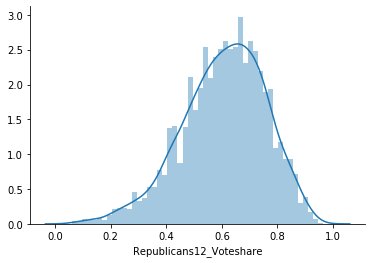

In [153]:
# Before testing let's see if the 'Republicans12_Voteshare' has a normal distribution
import seaborn as sns

sns.distplot(sp['Republicans12_Voteshare'], bins=50)
sns.despine()

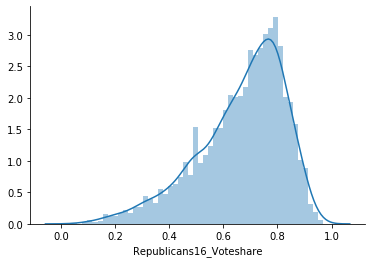

In [154]:
# For 'Republicans16_Voteshare'

sns.distplot(sp['Republicans16_Voteshare'], bins=50)
sns.despine()

From the histograms we can see that the 'Republicans12_Voteshare' has a relatively normal distribution whereas 'Republicans16_Voteshare' has only somewhat of a normal distribution, as it is more skewed. 

In [155]:
# Conducting a statistical test now
sample_test= stats.ttest_rel(sp['Republicans12_Voteshare'],sp['Republicans16_Voteshare'])
sample_test

Ttest_relResult(statistic=-62.952440994305775, pvalue=0.0)

Since the test shows that pvalue is 0 and pvalue less than 0.5 rejects the Null hypothesis,\
we can confirm  that this rejects our Null hypothesis.\
To summarize, we don't have enough evidence to accept the null hypothesis so we can say that the 'Republicans12_Voteshare' and the 'Republicans16_Voteshare' are different from each other.

### 3. Fit a statistical model that predicts the 2016 relative vote share of the Republican party within a county using the county-level demographic data. Explain why you chose that particular model. When building your model, answer the following questions:

    What are the data points? What are the independent and dependent variables?
    How good is the fit of your model? What metric is a good measure to evaluate your model? Interpret your results.



In [156]:
# Checking our data once again
sp.head()

,Democrats 12 (Votes),Republicans 12 (Votes),votes16_trumpd,votes16_clintonh,Fips,Democrats12_Voteshare,Republicans12_Voteshare,Democrats16_Voteshare,Republicans16_Voteshare,State,...,Adult.obesity,Diabetes,Sexually.transmitted.infections,HIV.prevalence.rate,Uninsured,Unemployment,Violent.crime,Homicide.rate,Injury.deaths,Infant.mortality
0,2630.0,3887.0,3967.0,2364.0,5043,0.403560,0.596440,0.373401,0.626599,Arkansas,...,0.323,0.126,747.3,79.9,0.197,0.108,449.02,6.285803,82.0,7.737553
1,2099.0,4263.0,4917.0,1587.0,5087,0.329928,0.670072,0.244004,0.755996,Arkansas,...,0.328,0.135,247.2,131.3,0.239,0.053,245.83,6.285803,96.8,7.737553
2,1845.0,4136.0,4353.0,1544.0,13159,0.308477,0.691523,0.261828,0.738172,Georgia,...,0.298,0.118,324.1,402.4,0.239,0.096,205.60,6.285803,71.6,7.737553
3,12792.0,9411.0,8153.0,12652.0,8037,0.576138,0.423862,0.608123,0.391877,Colorado,...,0.132,0.036,190.9,133.7,0.230,0.081,123.88,6.285803,42.9,3.500000
4,2442.0,5214.0,5021.0,1836.0,13091,0.318966,0.681034,0.267756,0.732244,Georgia,...,0.358,0.153,497.9,315.8,0.208,0.115,477.48,8.110000,79.4,7.737553


In [157]:
# Keeping the columns handy
sp.columns

Index(['Democrats 12 (Votes)', 'Republicans 12 (Votes)', 'votes16_trumpd',
       'votes16_clintonh', 'Fips', 'Democrats12_Voteshare',
       'Republicans12_Voteshare', 'Democrats16_Voteshare',
       'Republicans16_Voteshare', 'State', 'ST', 'County', 'Precincts',
       'Votes', 'Less Than High School Diploma',
       'At Least High School Diploma', 'At Least Bachelors's Degree',
       'Graduate Degree', 'School Enrollment', 'Median Earnings 2010',
       'White (Not Latino) Population', 'African American Population',
       'Native American Population', 'Asian American Population',
       'Other Race or Races', 'Latino Population',
       'Children Under 6 Living in Poverty',
       'Adults 65 and Older Living in Poverty', 'Total Population',
       'Preschool.Enrollment.Ratio.enrolled.ages.3.and.4',
       'Poverty.Rate.below.federal.poverty.threshold', 'Gini.Coefficient',
       'Child.Poverty.living.in.families.below.the.poverty.line',
       'Management.professional.and.related

To check if there is any correlation between any columns to the Replublicans16_Voteshare, lets plot all the columns to compare: 

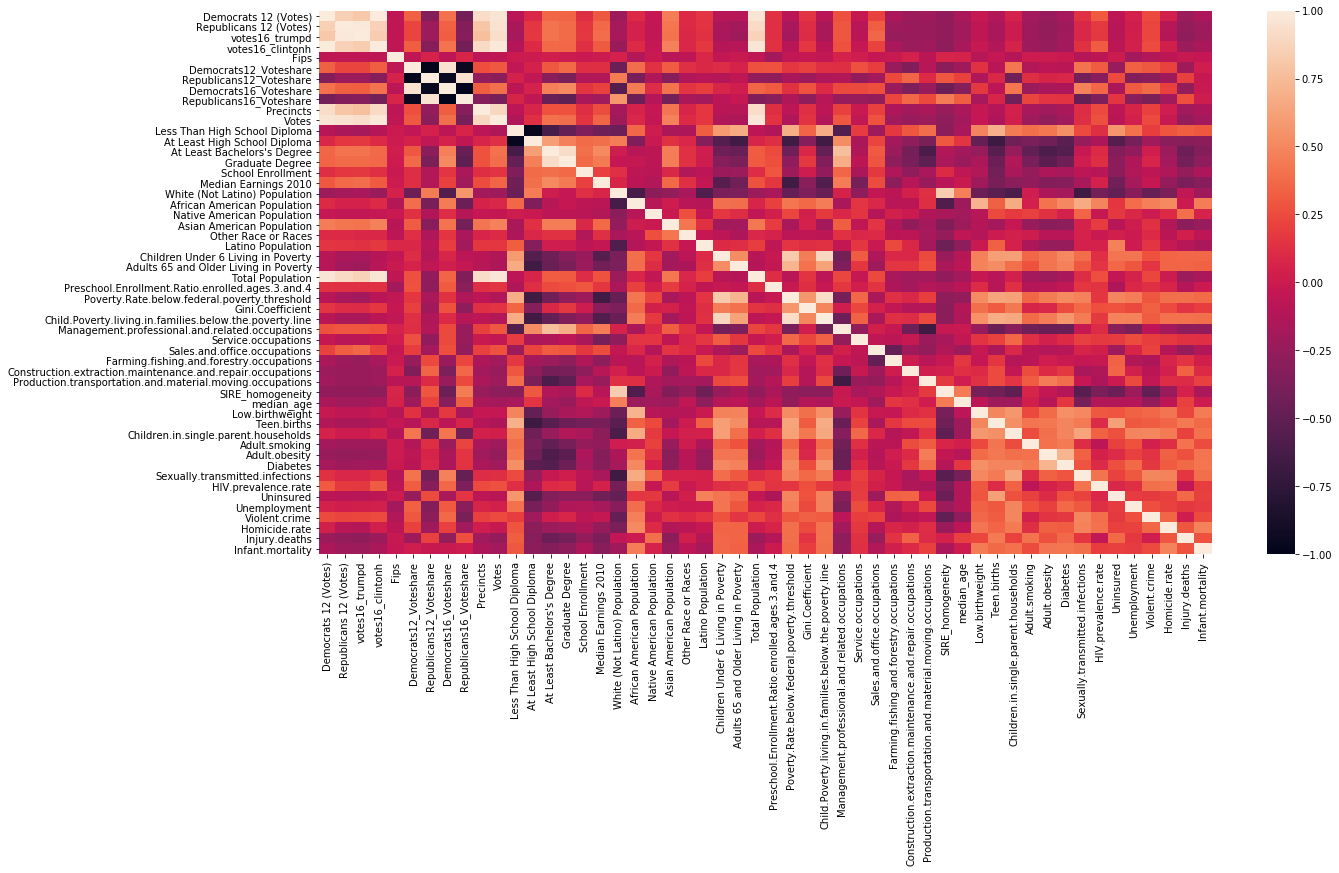

In [208]:
plt.figure(figsize=(20,10))
sns.heatmap(corr)
plt.show()

We see a lot of multi collinearity between few columns like 'teen births' have a high correlation to 'At least high school diploma' and 'Sexually.transmitted.infections' have a correlation with 'White(Not Latino)Population, we'll use this plot to avoid multi-collinearity with our model.

To start checking for correlations let's state a variable X which has all the columns relating to our demographic data and y to be our prediction i.e 'Replublicans16_Voteshare.'

In [210]:
X= sp[['Less Than High School Diploma',
       'At Least High School Diploma', "At Least Bachelors's Degree",
       'Graduate Degree', 'School Enrollment', 'Median Earnings 2010',
       'White (Not Latino) Population', 'African American Population',
       'Native American Population', 'Asian American Population',
       'Other Race or Races', 'Latino Population',
       'Children Under 6 Living in Poverty',
       'Adults 65 and Older Living in Poverty', 'Total Population',
       'Preschool.Enrollment.Ratio.enrolled.ages.3.and.4',
       'Poverty.Rate.below.federal.poverty.threshold', 'Gini.Coefficient',
       'Child.Poverty.living.in.families.below.the.poverty.line',
       'Management.professional.and.related.occupations',
       'Service.occupations', 'Sales.and.office.occupations',
       'Farming.fishing.and.forestry.occupations',
       'Construction.extraction.maintenance.and.repair.occupations',
       'Production.transportation.and.material.moving.occupations',
       'SIRE_homogeneity', 'median_age', 'Low.birthweight', 'Teen.births',
       'Children.in.single.parent.households', 'Adult.smoking',
       'Adult.obesity', 'Diabetes', 'Sexually.transmitted.infections',
       'HIV.prevalence.rate', 'Uninsured', 'Unemployment', 'Violent.crime',
       'Homicide.rate', 'Injury.deaths', 'Infant.mortality']]
#Checking
X.head()

,Less Than High School Diploma,At Least High School Diploma,At Least Bachelors's Degree,Graduate Degree,School Enrollment,Median Earnings 2010,White (Not Latino) Population,African American Population,Native American Population,Asian American Population,...,Adult.obesity,Diabetes,Sexually.transmitted.infections,HIV.prevalence.rate,Uninsured,Unemployment,Violent.crime,Homicide.rate,Injury.deaths,Infant.mortality
0,19.4,80.6,19.4,5.7,78.5,21988.947300,67.90,27.95,0.15,0.55,...,0.323,0.126,747.3,79.9,0.197,0.108,449.02,6.285803,82.0,7.737553
1,24.2,75.8,13.4,4.1,76.4,23365.948890,92.00,0.25,1.25,0.30,...,0.328,0.135,247.2,131.3,0.239,0.053,245.83,6.285803,96.8,7.737553
2,21.7,78.3,13.3,5.6,70.2,25363.060950,72.70,22.20,0.40,0.10,...,0.298,0.118,324.1,402.4,0.239,0.096,205.60,6.285803,71.6,7.737553
3,12.8,87.2,45.9,11.7,64.1,35484.543175,68.40,0.30,0.25,1.15,...,0.132,0.036,190.9,133.7,0.230,0.081,123.88,6.285803,42.9,3.500000
4,23.1,76.9,13.8,4.8,61.5,26927.608255,66.15,29.80,0.15,0.45,...,0.358,0.153,497.9,315.8,0.208,0.115,477.48,8.110000,79.4,7.737553


In [211]:
# To create y
y= sp['Republicans16_Voteshare']
y.head()

0    0.626599
1    0.755996
2    0.738172
3    0.391877
4    0.732244
Name: Republicans16_Voteshare, dtype: float64

To check for correlation between all columns for our demographic county data to our Republicans16_Voteshare, let's plot  for all our demographic columns to see if we have a linear relationship anywhere.

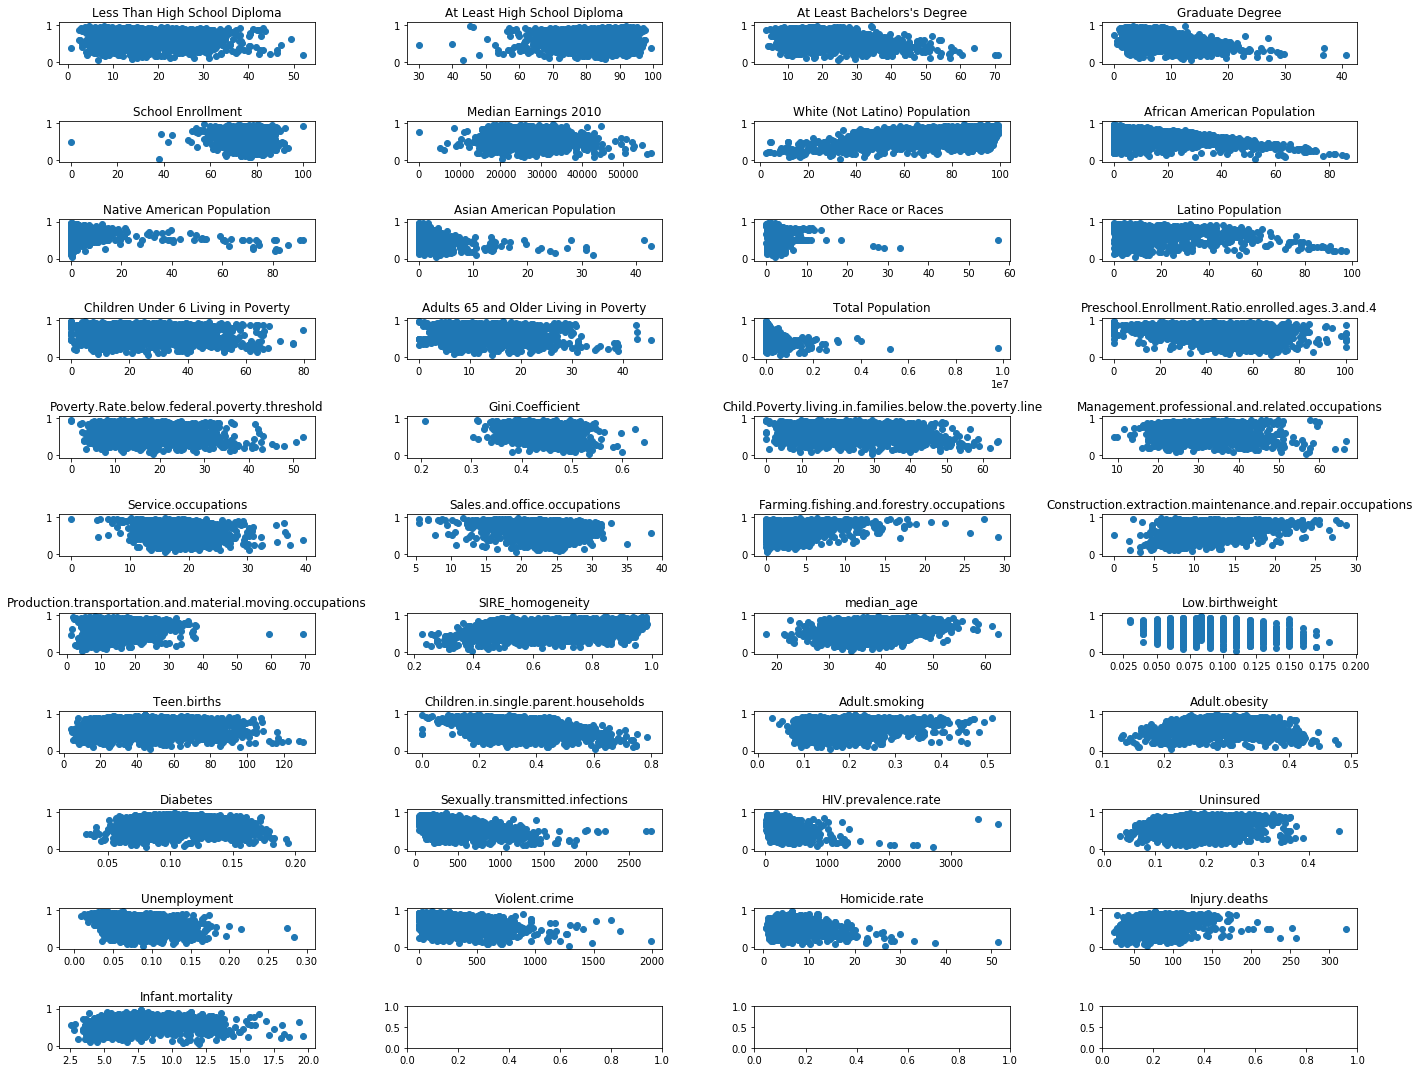

In [254]:
plt.subplots(11,4, figsize=(20,15))

count = 1

for col in X.columns:
    plt.subplot(11,4,count)
    plt.scatter(X[col],y)
    plt.title(col)
    
    count += 1
    
plt.tight_layout()
plt.show()

After observing the data, we can see some linear correlation between White(Not Latino), while there's an inverse correlation relationship between African American Population and Democrats12_Voteshare. Most of the columns don't have a set pattern of relationship. To understand our dependent and independent variables better let's start by making a model.

In [159]:
#To keep an eye on the correlation values
corr['Republicans16_Voteshare'].sort_values()

Democrats16_Voteshare                                        -1.000000
Democrats12_Voteshare                                        -0.945472
Graduate Degree                                              -0.515317
Sexually.transmitted.infections                              -0.472257
At Least Bachelors's Degree                                  -0.463351
African American Population                                  -0.452888
Children.in.single.parent.households                         -0.423869
Asian American Population                                    -0.411752
votes16_clintonh                                             -0.406274
Democrats 12 (Votes)                                         -0.401650
Votes                                                        -0.392884
Violent.crime                                                -0.368599
HIV.prevalence.rate                                          -0.365212
Total Population                                             -0.346634
Republ

The best way to predict the Republicans16_Voteshare would be to model it with Multiple linear regression, since many columns can contribute to the prediction of Republicans16_Voteshare it can be said multiple variables play a role in the prediction hence Multiple linear regression.Since there are too many columns we can assume that not all columns would play a part in the prediction,so to sort the columns we can select columns which has a correlation coefficient of above 0.3 and below -0.4  to maximize our model and we can say that the other columns have too low of a coefficient to be considered.

Since we are predicting Voteshare16 based on demographic data, let's try out our first model with all the columns excluding columns from the votes dataset and y to be our 'Republicans16_Voteshare' column To start off our model by adding the comstant.

In [212]:
#Adding the constant is the important step for any model.
X_withconstant = sm.add_constant(X)
# Checking
X_withconstant.head()

,const,Less Than High School Diploma,At Least High School Diploma,At Least Bachelors's Degree,Graduate Degree,School Enrollment,Median Earnings 2010,White (Not Latino) Population,African American Population,Native American Population,...,Adult.obesity,Diabetes,Sexually.transmitted.infections,HIV.prevalence.rate,Uninsured,Unemployment,Violent.crime,Homicide.rate,Injury.deaths,Infant.mortality
0,1.0,19.4,80.6,19.4,5.7,78.5,21988.947300,67.90,27.95,0.15,...,0.323,0.126,747.3,79.9,0.197,0.108,449.02,6.285803,82.0,7.737553
1,1.0,24.2,75.8,13.4,4.1,76.4,23365.948890,92.00,0.25,1.25,...,0.328,0.135,247.2,131.3,0.239,0.053,245.83,6.285803,96.8,7.737553
2,1.0,21.7,78.3,13.3,5.6,70.2,25363.060950,72.70,22.20,0.40,...,0.298,0.118,324.1,402.4,0.239,0.096,205.60,6.285803,71.6,7.737553
3,1.0,12.8,87.2,45.9,11.7,64.1,35484.543175,68.40,0.30,0.25,...,0.132,0.036,190.9,133.7,0.230,0.081,123.88,6.285803,42.9,3.500000
4,1.0,23.1,76.9,13.8,4.8,61.5,26927.608255,66.15,29.80,0.15,...,0.358,0.153,497.9,315.8,0.208,0.115,477.48,8.110000,79.4,7.737553


In [163]:
from statsmodels.regression import linear_model 
import statsmodels.api as sm

In [213]:
#First we initiate the model
lm_votes= sm.OLS(y,X_withconstant)

# Fitting the model
lm_votes_results= lm_votes.fit()

#Checking the summary of the results
lm_votes_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Republicans16_Voteshare   R-squared:                       0.807
Model:                                 OLS   Adj. R-squared:                  0.805
Method:                      Least Squares   F-statistic:                     316.5
Date:                     Sun, 26 Jul 2020   Prob (F-statistic):               0.00
Time:                             12:36:33   Log-Likelihood:                 3865.2
No. Observations:                     3141   AIC:                            -7646.
Df Residuals:                         3099   BIC:                            -7392.
Df Model:                               41                                         
Covariance Type:                 nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                         -1.5348      3.626     -0.423      0.672      -8.645       5.576
Less Than High School Diploma                                 -0.0003      0.001     -0.410      0.682      -0.002       0.001
At Least High School Diploma                               -6.856e-05      0.001     -0.097      0.923      -0.001       0.001
At Least Bachelors's Degree                                   -0.0058      0.001     -9.823      0.000      -0.007      -0.005
Graduate Degree                                               -0.0079      0.001     -7.912      0.000      -0.010      -0.006
School Enrollment                                              0.0004      0.000      1.343      0.179      -0.000       0.001
Median Earnings 2010                                       -9.508e-07   4.93e-07     -1.928      0.054   -1.92e-06    1.63e-08
White (Not Latino) Population                                  0.0069      0.026      0.262      0.793      -0.045       0.058
African American Population                                   -0.0008      0.026     -0.031      0.975      -0.052       0.051
Native American Population                                     0.0004      0.026      0.014      0.989      -0.051       0.052
Asian American Population                                      0.0003      0.026      0.011      0.992      -0.051       0.052
Other Race or Races                                           -0.0024      0.026     -0.093      0.926      -0.054       0.049
Latino Population                                              0.0007      0.026      0.027      0.978      -0.051       0.052
Children Under 6 Living in Poverty                            -0.0002      0.000     -0.819      0.413      -0.001       0.000
Adults 65 and Older Living in Poverty                      -3.113e-05      0.000     -0.075      0.940      -0.001       0.001
Total Population                                           -2.756e-08      5e-09     -5.512      0.000   -3.74e-08   -1.78e-08
Preschool.Enrollment.Ratio.enrolled.ages.3.and.4           -5.226e-05   9.91e-05     -0.527      0.598      -0.000       0.000
Poverty.Rate.below.federal.poverty.threshold                  -0.0041      0.001     -4.812      0.000      -0.006      -0.002
Gini.Coefficient                                               0.1302      0.053      2.468      0.014       0.027       0.234
Child.Poverty.living.in.families.below.the.poverty.line        0.0014      0.001      2.686      0.007       0.000       0.002
Management.professional.and.related.occupations                0.0224      0.025      0.890      0.373     

#### For evaluating our model we can use the R aquared value which is an important metric in determining our accuracy of our model. The closer it is to 1 the more accurate our model would be.

The above model has a high R squared value of 0.807 which is pretty good but it's high mostly because we have a lot of columns which add to the value, but we also have a lot of columns with a high p value. First let's try a residual plot to see if the residuals are normal.

Let's check the residual plot for our summary. To see if it's normal.

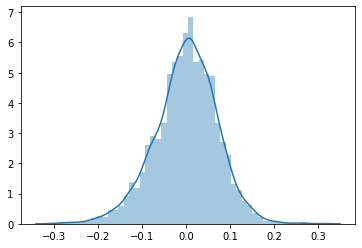

In [214]:
sns.distplot(lm_votes_results.resid)

The residual plot has a almost normal distribution.

Now to check if the scatter plot of residuals and fitted values give us a scattered plot with values everywhere which helps us whether the model we made is a better fit.

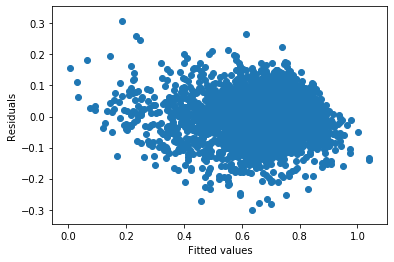

In [215]:
plt.figure()
plt.scatter(lm_votes_results.fittedvalues, lm_votes_results.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

The scatter plot looks to be distorted with is good for our model with some downward pattern. Since we have a lot of unneccesary columns with a high p value, it damages our model.

Let's try removing some columns with a high p value like 'At Least High School Diploma',
'African American Population','Native American Population' and 'Adults 65 and Older Living in Poverty' which have a pvalue aroung 0.9 to increase our accuracy of our model.

In [240]:
#So our new X2 would be
X2= sp[['Less Than High School Diploma',
        "At Least Bachelors's Degree",
       'Graduate Degree', 'School Enrollment', 'Median Earnings 2010',
       'White (Not Latino) Population', 'Asian American Population',
       'Other Race or Races', 'Latino Population',
       'Children Under 6 Living in Poverty', 'Total Population',
       'Preschool.Enrollment.Ratio.enrolled.ages.3.and.4',
       'Poverty.Rate.below.federal.poverty.threshold', 'Gini.Coefficient',
       'Child.Poverty.living.in.families.below.the.poverty.line',
       'Management.professional.and.related.occupations',
       'Service.occupations', 'Sales.and.office.occupations',
       'Farming.fishing.and.forestry.occupations',
       'Construction.extraction.maintenance.and.repair.occupations',
       'Production.transportation.and.material.moving.occupations',
       'SIRE_homogeneity', 'median_age', 'Low.birthweight', 'Teen.births',
       'Children.in.single.parent.households', 'Adult.smoking',
       'Adult.obesity', 'Diabetes', 'Sexually.transmitted.infections',
       'HIV.prevalence.rate', 'Uninsured', 'Unemployment', 'Violent.crime',
       'Homicide.rate', 'Injury.deaths', 'Infant.mortality']]
#Adding a constant
X2_c= sm.add_constant(X2)

Now, let's initiate, fit the model and look at the summary to understand our improved model

In [255]:
# Initiating
lm_votes2= sm.OLS(y,X2_c)

# Fitting the model
lm_votes2_results= lm_votes2.fit()

#Checking the summary of the results
lm_votes2_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Republicans16_Voteshare   R-squared:                       0.806
Model:                                 OLS   Adj. R-squared:                  0.804
Method:                      Least Squares   F-statistic:                     349.0
Date:                     Sun, 26 Jul 2020   Prob (F-statistic):               0.00
Time:                             14:22:41   Log-Likelihood:                 3857.3
No. Observations:                     3141   AIC:                            -7639.
Df Residuals:                         3103   BIC:                            -7409.
Df Model:                               37                                         
Covariance Type:                 nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                         -1.6411      2.520     -0.651      0.515      -6.583       3.301
Less Than High School Diploma                                 -0.0005      0.000     -1.332      0.183      -0.001       0.000
At Least Bachelors's Degree                                   -0.0060      0.001    -10.260      0.000      -0.007      -0.005
Graduate Degree                                               -0.0079      0.001     -7.948      0.000      -0.010      -0.006
School Enrollment                                              0.0005      0.000      1.517      0.129      -0.000       0.001
Median Earnings 2010                                        -9.11e-07   4.87e-07     -1.872      0.061   -1.86e-06     4.3e-08
White (Not Latino) Population                                  0.0072      0.000     31.070      0.000       0.007       0.008
Asian American Population                                      0.0006      0.001      0.785      0.433      -0.001       0.002
Other Race or Races                                           -0.0014      0.001     -1.637      0.102      -0.003       0.000
Latino Population                                              0.0011      0.000      5.015      0.000       0.001       0.002
Children Under 6 Living in Poverty                            -0.0002      0.000     -0.739      0.460      -0.001       0.000
Total Population                                           -2.651e-08      5e-09     -5.303      0.000   -3.63e-08   -1.67e-08
Preschool.Enrollment.Ratio.enrolled.ages.3.and.4           -5.465e-05   9.91e-05     -0.551      0.582      -0.000       0.000
Poverty.Rate.below.federal.poverty.threshold                  -0.0039      0.001     -5.128      0.000      -0.005      -0.002
Gini.Coefficient                                               0.1240      0.053      2.355      0.019       0.021       0.227
Child.Poverty.living.in.families.below.the.poverty.line        0.0013      0.000      2.504      0.012       0.000       0.002
Management.professional.and.related.occupations                0.0234      0.025      0.928      0.354      -0.026       0.073
Service.occupations                                            0.0176      0.025      0.699      0.484      -0.032       0.067
Sales.and.office.occupations                                   0.0196      0.025      0.778      0.437      -0.030       0.069
Farming.fishing.and.forestry.occupations                       0.0209      0.025      0.829      0.407      -0.029       0.070
Construction.extraction.maintenance.and.repair.occupations     0.0215      0.025      0.855      0.393     

Let's plot our residual plot to check normality, if it has improved.

The model's R squared value decreased by 0.01 which does not seem too significant. Let's try looking at our residual plot.


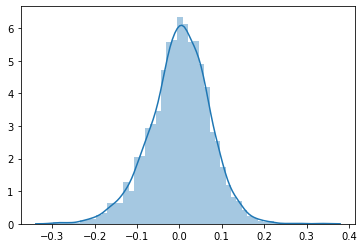

In [256]:
sns.distplot(lm_votes2_results.resid)

The residual plot seems to be better than before and looks more normal so it clearly improved our model.Let's also look at the scatter plot to re-affirm our distortion.

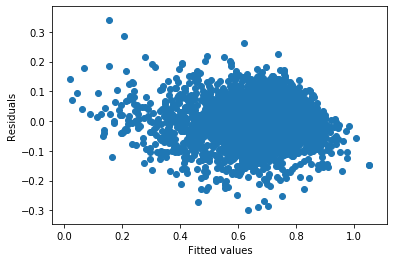

In [257]:
plt.figure()
plt.scatter(lm_votes2_results.fittedvalues, lm_votes2_results.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

The distortion seems to look the same. 

Now, to improve our model let's take out columns with high p-value to implement a cleaner model. Taking out 'Adult.obesity','Children Under 6 Living Poverty', 'Preschool.Enrollment.Ratio.enrolled.ages.3.and.4' and 'Sales.and.office.occupations, let's see how it impacts our model.

In [261]:
X3= sp[['Less Than High School Diploma',
        "At Least Bachelors's Degree",
       'Graduate Degree', 'School Enrollment', 'Median Earnings 2010',
       'White (Not Latino) Population', 'Asian American Population',
       'Other Race or Races', 'Latino Population', 'Total Population',
       'Poverty.Rate.below.federal.poverty.threshold', 'Gini.Coefficient',
       'Child.Poverty.living.in.families.below.the.poverty.line',
       'Management.professional.and.related.occupations',
       'Service.occupations','Farming.fishing.and.forestry.occupations',
       'Construction.extraction.maintenance.and.repair.occupations',
       'Production.transportation.and.material.moving.occupations',
       'SIRE_homogeneity', 'median_age', 'Low.birthweight', 'Teen.births',
       'Children.in.single.parent.households', 'Adult.smoking', 'Diabetes', 'Sexually.transmitted.infections',
       'HIV.prevalence.rate', 'Uninsured', 'Unemployment', 'Violent.crime',
       'Homicide.rate', 'Injury.deaths', 'Infant.mortality']]
X3_c= sm.add_constant(X3)

In [262]:
# Initiating the model
lm_votes3= sm.OLS(y,X3_c)

# Fitting the model
lm_votes3_results= lm_votes3.fit()

#Checking the summary of the results
lm_votes3_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Republicans16_Voteshare   R-squared:                       0.806
Model:                                 OLS   Adj. R-squared:                  0.804
Method:                      Least Squares   F-statistic:                     391.5
Date:                     Sun, 26 Jul 2020   Prob (F-statistic):               0.00
Time:                             14:45:33   Log-Likelihood:                 3856.5
No. Observations:                     3141   AIC:                            -7645.
Df Residuals:                         3107   BIC:                            -7439.
Df Model:                               33                                         
Covariance Type:                 nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                          0.3133      0.057      5.465      0.000       0.201       0.426
Less Than High School Diploma                                 -0.0005      0.000     -1.284      0.199      -0.001       0.000
At Least Bachelors's Degree                                   -0.0059      0.001    -10.292      0.000      -0.007      -0.005
Graduate Degree                                               -0.0079      0.001     -8.011      0.000      -0.010      -0.006
School Enrollment                                              0.0004      0.000      1.372      0.170      -0.000       0.001
Median Earnings 2010                                       -8.965e-07   4.85e-07     -1.847      0.065   -1.85e-06    5.51e-08
White (Not Latino) Population                                  0.0072      0.000     31.571      0.000       0.007       0.008
Asian American Population                                      0.0006      0.001      0.786      0.432      -0.001       0.002
Other Race or Races                                           -0.0014      0.001     -1.596      0.111      -0.003       0.000
Latino Population                                              0.0011      0.000      5.235      0.000       0.001       0.002
Total Population                                           -2.622e-08   4.98e-09     -5.260      0.000    -3.6e-08   -1.64e-08
Poverty.Rate.below.federal.poverty.threshold                  -0.0038      0.001     -5.109      0.000      -0.005      -0.002
Gini.Coefficient                                               0.1237      0.052      2.356      0.019       0.021       0.227
Child.Poverty.living.in.families.below.the.poverty.line        0.0010      0.000      2.475      0.013       0.000       0.002
Management.professional.and.related.occupations                0.0038      0.001      7.200      0.000       0.003       0.005
Service.occupations                                           -0.0020      0.001     -3.214      0.001      -0.003      -0.001
Farming.fishing.and.forestry.occupations                       0.0013      0.001      1.940      0.053   -1.46e-05       0.003
Construction.extraction.maintenance.and.repair.occupations     0.0020      0.001      3.108      0.002       0.001       0.003
Production.transportation.and.material.moving.occupations     -0.0012      0.000     -2.500      0.012      -0.002      -0.000
SIRE_homogeneity                                              -0.2218      0.016    -13.796      0.000      -0.253      -0.190
median_age                                                    -0.0044      0.000    -10.846      0.000     

All the columns which were removed had barely any damage on our R squared value so we improved our model. Looking at our plots again.

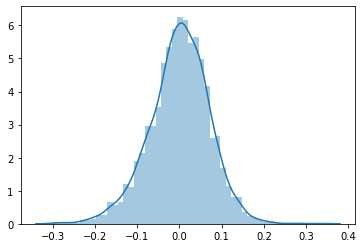

In [272]:
#Checking the residual normality
sns.distplot(lm_votes3_results.resid)

The plot seems to have a decent normal shape, still we have a lot of columns with high p-value which may deteriorate our model.

Taking off columns 'Less than high school diploma', 'Asian American Population' and 'Adult.smoking' we get the following model.

In [263]:
X4= sp[['Less Than High School Diploma',
        "At Least Bachelors's Degree",
       'Graduate Degree', 'School Enrollment', 'Median Earnings 2010',
       'White (Not Latino) Population','Other Race or Races', 'Latino Population','Total Population',
       'Poverty.Rate.below.federal.poverty.threshold', 'Gini.Coefficient',
       'Child.Poverty.living.in.families.below.the.poverty.line',
       'Management.professional.and.related.occupations',
       'Farming.fishing.and.forestry.occupations',
       'Construction.extraction.maintenance.and.repair.occupations',
       'Production.transportation.and.material.moving.occupations',
       'SIRE_homogeneity', 'median_age', 'Low.birthweight', 'Teen.births',
       'Children.in.single.parent.households', 'Diabetes', 'Sexually.transmitted.infections',
       'HIV.prevalence.rate', 'Uninsured', 'Unemployment', 'Violent.crime',
       'Homicide.rate', 'Injury.deaths', 'Infant.mortality']]
X4_c= sm.add_constant(X4)

In [264]:
lm_votes4= sm.OLS(y,X4_c)

# Fitting the model
lm_votes4_results= lm_votes4.fit()

#Checking the summary of the results
lm_votes4_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Republicans16_Voteshare   R-squared:                       0.805
Model:                                 OLS   Adj. R-squared:                  0.804
Method:                      Least Squares   F-statistic:                     429.2
Date:                     Sun, 26 Jul 2020   Prob (F-statistic):               0.00
Time:                             14:49:46   Log-Likelihood:                 3850.9
No. Observations:                     3141   AIC:                            -7640.
Df Residuals:                         3110   BIC:                            -7452.
Df Model:                               30                                         
Covariance Type:                 nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                          0.2050      0.046      4.457      0.000       0.115       0.295
Less Than High School Diploma                                 -0.0005      0.000     -1.234      0.217      -0.001       0.000
At Least Bachelors's Degree                                   -0.0057      0.001    -10.049      0.000      -0.007      -0.005
Graduate Degree                                               -0.0082      0.001     -8.318      0.000      -0.010      -0.006
School Enrollment                                              0.0005      0.000      1.554      0.120      -0.000       0.001
Median Earnings 2010                                       -5.641e-07   4.72e-07     -1.194      0.233   -1.49e-06    3.62e-07
White (Not Latino) Population                                  0.0072      0.000     32.608      0.000       0.007       0.008
Other Race or Races                                           -0.0012      0.001     -1.441      0.150      -0.003       0.000
Latino Population                                              0.0011      0.000      5.291      0.000       0.001       0.002
Total Population                                           -2.411e-08    4.8e-09     -5.021      0.000   -3.35e-08   -1.47e-08
Poverty.Rate.below.federal.poverty.threshold                  -0.0040      0.001     -5.362      0.000      -0.005      -0.003
Gini.Coefficient                                               0.1354      0.052      2.582      0.010       0.033       0.238
Child.Poverty.living.in.families.below.the.poverty.line        0.0011      0.000      2.529      0.011       0.000       0.002
Management.professional.and.related.occupations                0.0048      0.000     10.877      0.000       0.004       0.006
Farming.fishing.and.forestry.occupations                       0.0022      0.001      3.474      0.001       0.001       0.003
Construction.extraction.maintenance.and.repair.occupations     0.0028      0.001      4.993      0.000       0.002       0.004
Production.transportation.and.material.moving.occupations     -0.0001      0.000     -0.383      0.702      -0.001       0.001
SIRE_homogeneity                                              -0.2233      0.016    -13.909      0.000      -0.255      -0.192
median_age                                                    -0.0046      0.000    -11.548      0.000      -0.005      -0.004
Low.birthweight                                                0.3496      0.095      3.696      0.000       0.164       0.535
Teen.births                                                    0.0013      0.000      9.754      0.000     

We don't notice too much change in the R squared value. Looking at the plots.

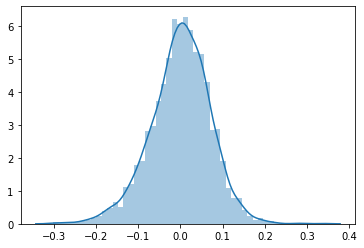

In [265]:
sns.distplot(lm_votes4_results.resid)

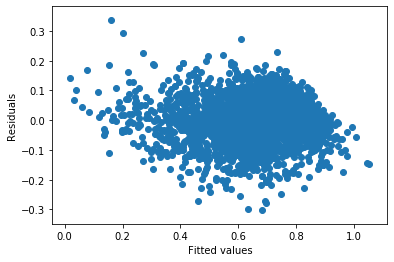

In [233]:
plt.figure()
plt.scatter(lm_v8_results.fittedvalues, lm_v8_results.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

Both the plots seem to have the same pattern as previous plots. But let's see how taking off all the columns with a p-value more than 0.05 have a effect.

Taking off 'Less Than High School Diploma', 'Median Earnings 2010', 
'School Enrollment', 'Other Race or Races', 'Production.transportation.and.material.moving.occupations', 'Sexually.transmitted.infections' and
'HIV.prevalence.rate' columns, let's see our model:

In [274]:
X5= sp[["At Least Bachelors's Degree",
       'Graduate Degree', 
       'White (Not Latino) Population','Latino Population','Total Population',
       'Poverty.Rate.below.federal.poverty.threshold', 'Gini.Coefficient',
       'Child.Poverty.living.in.families.below.the.poverty.line',
       'Management.professional.and.related.occupations',
       'Farming.fishing.and.forestry.occupations',
       'Construction.extraction.maintenance.and.repair.occupations',
       'SIRE_homogeneity', 'median_age', 'Low.birthweight', 'Teen.births',
       'Children.in.single.parent.households', 'Diabetes',
        'Uninsured', 'Unemployment', 'Violent.crime',
       'Homicide.rate', 'Injury.deaths', 'Infant.mortality']]
X5_c= sm.add_constant(X5)

In [276]:
lm_votes5= sm.OLS(y,X5_c)

# Fitting the model
lm_votes5_results= lm_votes5.fit()

#Checking the summary of the results
lm_votes5_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Republicans16_Voteshare   R-squared:                       0.805
Model:                                 OLS   Adj. R-squared:                  0.803
Method:                      Least Squares   F-statistic:                     557.7
Date:                     Sun, 26 Jul 2020   Prob (F-statistic):               0.00
Time:                             15:11:16   Log-Likelihood:                 3843.3
No. Observations:                     3141   AIC:                            -7639.
Df Residuals:                         3117   BIC:                            -7493.
Df Model:                               23                                         
Covariance Type:                 nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                          0.1736      0.030      5.753      0.000       0.114       0.233
At Least Bachelors's Degree                                   -0.0054      0.001    -10.300      0.000      -0.006      -0.004
Graduate Degree                                               -0.0086      0.001     -9.035      0.000      -0.011      -0.007
White (Not Latino) Population                                  0.0075      0.000     40.236      0.000       0.007       0.008
Latino Population                                              0.0014      0.000      7.605      0.000       0.001       0.002
Total Population                                           -2.666e-08   4.72e-09     -5.652      0.000   -3.59e-08   -1.74e-08
Poverty.Rate.below.federal.poverty.threshold                  -0.0036      0.001     -5.450      0.000      -0.005      -0.002
Gini.Coefficient                                               0.1306      0.051      2.578      0.010       0.031       0.230
Child.Poverty.living.in.families.below.the.poverty.line        0.0009      0.000      2.278      0.023       0.000       0.002
Management.professional.and.related.occupations                0.0047      0.000     12.995      0.000       0.004       0.005
Farming.fishing.and.forestry.occupations                       0.0023      0.001      3.697      0.000       0.001       0.003
Construction.extraction.maintenance.and.repair.occupations     0.0028      0.000      5.767      0.000       0.002       0.004
SIRE_homogeneity                                              -0.2207      0.016    -14.135      0.000      -0.251      -0.190
median_age                                                    -0.0046      0.000    -11.952      0.000      -0.005      -0.004
Low.birthweight                                                0.3359      0.091      3.688      0.000       0.157       0.515
Teen.births                                                    0.0012      0.000      9.466      0.000       0.001       0.001
Children.in.single.parent.households                          -0.2807      0.023    -12.305      0.000      -0.325      -0.236
Diabetes                                                       1.1038      0.095     11.637      0.000       0.918       1.290
Uninsured                                                      0.7193      0.038     18.703      0.000       0.644       0.795
Unemployment                                                  -0.8348      0.060    -14.016      0.000      -0.952      -0.718
Violent.crime                                              -3.127e-05   8.22e-06     -3.805      0.000   -4

#### This model looks like our best fit so far with the R squared value staying at 0.805 with all p-values below 0.05 we don't have any bizarre statistic values.

Let's look at the normal distribution and scatter plots for the last time.

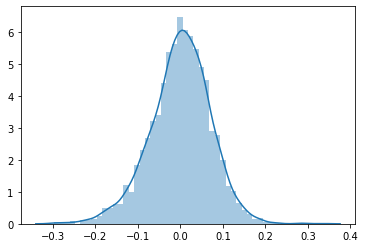

In [277]:
sns.distplot(lm_votes5_results.resid)

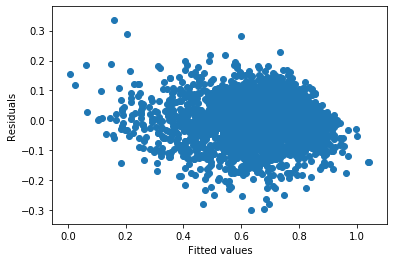

In [278]:
plt.figure()
plt.scatter(lm_votes5_results.fittedvalues, lm_votes5_results.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

The residual plot looks like it's the best normal plot we can achieve. For the scatter plot we still have a pretty distorted plot with no apparent pattern which signifies that the model is as perfect as it can get.

#### For our dependent variables we can say that the variables we discarded due to collinearity since they were dependent on each other

In [287]:
X.columns

Index(['Less Than High School Diploma', 'At Least High School Diploma',
       'At Least Bachelors's Degree', 'Graduate Degree', 'School Enrollment',
       'Median Earnings 2010', 'White (Not Latino) Population',
       'African American Population', 'Native American Population',
       'Asian American Population', 'Other Race or Races', 'Latino Population',
       'Children Under 6 Living in Poverty',
       'Adults 65 and Older Living in Poverty', 'Total Population',
       'Preschool.Enrollment.Ratio.enrolled.ages.3.and.4',
       'Poverty.Rate.below.federal.poverty.threshold', 'Gini.Coefficient',
       'Child.Poverty.living.in.families.below.the.poverty.line',
       'Management.professional.and.related.occupations',
       'Service.occupations', 'Sales.and.office.occupations',
       'Farming.fishing.and.forestry.occupations',
       'Construction.extraction.maintenance.and.repair.occupations',
       'Production.transportation.and.material.moving.occupations',
       'SIRE_homo

They were: ''Less Than High School Diploma', 'At Least High School Diploma','School Enrollment','Median Earnings 2010','African American Population', 'Native American Population','Asian American Population', 'Other Race or Races','Children Under 6 Living in Poverty','Adults 65','Preschool.Enrollment.Ratio.enrolled.ages.3.and.4', 'Sales.and.office.occupations','Production.transportation.and.material.moving.occupatio
'Adult.smoking','Sexually.transmitted.infections'and 'HIV.prevalence.rate'

#### Since all the columns below have effect on our prediction but have no correlation between each other, they can be stated as independent variables.

In [279]:
#Looking at the independent columns we used to predict our voteshare
X5.columns

Index(['At Least Bachelors's Degree', 'Graduate Degree',
       'White (Not Latino) Population', 'Latino Population',
       'Total Population', 'Poverty.Rate.below.federal.poverty.threshold',
       'Gini.Coefficient',
       'Child.Poverty.living.in.families.below.the.poverty.line',
       'Management.professional.and.related.occupations',
       'Farming.fishing.and.forestry.occupations',
       'Construction.extraction.maintenance.and.repair.occupations',
       'SIRE_homogeneity', 'median_age', 'Low.birthweight', 'Teen.births',
       'Children.in.single.parent.households', 'Diabetes', 'Uninsured',
       'Unemployment', 'Violent.crime', 'Homicide.rate', 'Injury.deaths',
       'Infant.mortality'],
      dtype='object')

Based on our last model we can say that all the columns play a role in determining our prediction i.e the Relative Voteshare for Republicans16 election.\
We can say that the people with Bachelor's degree, Graduate degree contribute to the Republic voteshare.\
A lot of White or Latino population have a high chance of voting for Republicans for the 2016 elections.\
People living in poverty were likely to choose Republicans.\
Also people working in management positions, farming, fishing, construction and repair work are likely to vote for Republicans.\
People with Diabetes and people who are uninsured or unemployed are also likely to contribute to the voteshare.